In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# LOAD DATASET

In [2]:
x_train = np.loadtxt("input.csv" , delimiter = ",")
y_train = np.loadtxt("labels.csv" , delimiter = ",")

x_test = np.loadtxt("input_test.csv" , delimiter = ",")
y_test = np.loadtxt("labels_test.csv" , delimiter = ",")

In [3]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", x_test.shape)

Shape of x_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 100, 100, 3)


In [5]:
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

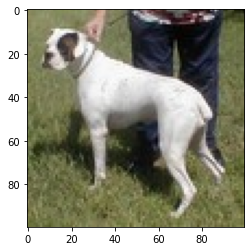

In [6]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

# MODEL

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation ="relu",input_shape =(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation ="relu"),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation = "relu"),
    Dense(1, activation = "sigmoid")
])

In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation ="relu",input_shape =(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation ="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))



In [9]:
model.compile(loss="binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

In [10]:
model.fit(x_train,y_train,epochs = 5, batch_size =64)

Epoch 1/5
32/32 [==============================] - 12s 312ms/step - loss: 0.7151 - accuracy: 0.5070
Epoch 2/5
32/32 [==============================] - 10s 307ms/step - loss: 0.6891 - accuracy: 0.5255
Epoch 3/5
32/32 [==============================] - 10s 317ms/step - loss: 0.6669 - accuracy: 0.6120
Epoch 4/5
32/32 [==============================] - 10s 320ms/step - loss: 0.6247 - accuracy: 0.6690
Epoch 5/5
32/32 [==============================] - 10s 320ms/step - loss: 0.5817 - accuracy: 0.6980


In [11]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 48ms/step - loss: 0.6511 - accuracy: 0.6250


[0.6510711908340454, 0.625]

# MAKING PREDICTIONS

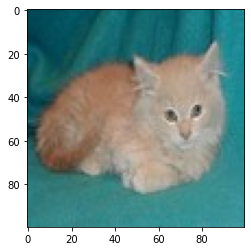

1/1 [==============================] - 0s 34ms/step
[[0.63036585]]
Our model says it is a : cat


In [18]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)

y_pred = y_pred>0.5

if(y_pred == 0):
    pred = "dog"
else:
    pred = "cat"
print("Our model says it is a :" , pred )    
    
    